# <font color='darkblue'>Executando Backtest no Modelo de Investimento "Magic Formula".
### <font color='darkblue'> Documentação Pandas, Fundamentus, QuantStats   
https://pypi.org/project/pandas/

https://www.fundamentus.com.br/index.php
    
https://pypi.org/project/QuantStats/

### <font color='darkblue'> Objetivo
* Construir um modelo de investimento vencedor, criar uma carteira utilizando todas as ações da B3, automatizar as escolhas das ações, efetuar o backtest, conectar na B3 para efetuar e efetuar a compra ou a venda das ações.

### <font color='darkblue'> Escolha de Indicadores e Execução do Teste do Joel Granblatt
* Vamos trabalhar com dois indicadores fundamentalista, Evebit e ROIC
* Vamos testar se a regra de investimento da fórmula mágica do Joel Grenblatt, funcionou no Brasil nos últimos anos.

In [19]:
# Instalar as bibliotecas abaixo:
# !pip install pandas
# !pip install quanstats 

In [20]:
# Importar as bibliotecas:
# Pandas é biblioteca open-source e de uso gratuito, que fornece ferramentas para análise e manipulação de dados em Python.
import pandas as pd
# Quantstats é uma biblioteca python utilizada para análises de finanças quantitativas e otimização de portfólio. 
import quantstats as qs 

### <font color='darkblue'> Baixando os Dados Dispobinilizados

In [21]:
dados_empresas = pd.read_csv("dados_empresas.csv")
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517
...,...,...,...,...,...,...
34825,2023-02-28,ZAMP3,4.81,3507640.0,0.03987,0.02483
34826,2023-03-31,ZAMP3,4.65,2745735.0,0.05451,0.03526
34827,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526
34828,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131


In [22]:
dados_empresas['volume_negociado']

0         5375545.0
1         3116406.0
2         3077805.0
3         3141709.0
4         6444929.0
            ...    
34825     3507640.0
34826     2745735.0
34827     4243398.0
34828     4414483.0
34829    17615157.0
Name: volume_negociado, Length: 34830, dtype: float64

### <font color='darkblue'> Filtrando Liquidez

In [23]:
dados_empresas = dados_empresas[dados_empresas['volume_negociado'] > 1000000]
dados_empresas

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517
...,...,...,...,...,...,...
34825,2023-02-28,ZAMP3,4.81,3507640.0,0.03987,0.02483
34826,2023-03-31,ZAMP3,4.65,2745735.0,0.05451,0.03526
34827,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526
34828,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131


### <font color='darkblue'> Calculando os Retornos Mensais das Empresas

In [24]:
dados_empresas[dados_empresas['ticker'] == 'WEGE3']

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
34321,2015-12-31,WEGE3,5.11,224742225.0,0.04720,0.08571
34322,2016-01-31,WEGE3,5.28,43367072.0,0.04569,0.08571
34323,2016-02-29,WEGE3,4.53,44454818.0,0.05262,0.09022
34324,2016-03-31,WEGE3,4.83,48549291.0,0.04963,0.09022
34325,2016-04-30,WEGE3,5.23,56903679.0,0.04490,0.09736
...,...,...,...,...,...,...
34407,2023-02-28,WEGE3,38.92,291906811.0,0.03102,0.22497
34408,2023-03-31,WEGE3,40.34,448613669.0,0.02995,0.22497
34409,2023-04-30,WEGE3,40.91,303639510.0,0.03223,0.24361
34410,2023-05-31,WEGE3,37.42,471656404.0,0.03528,0.24361


In [25]:
# Supondo que dados_empresas seja o seu DataFrame
dados_empresas_copy = dados_empresas.copy()

dados_empresas_copy['retorno'] = dados_empresas_copy.groupby('ticker')['preco_fechamento_ajustado'].pct_change()
dados_empresas_copy['retorno'] = dados_empresas_copy.groupby('ticker')['retorno'].shift(-1)
dados_empresas_copy

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890,-0.048443
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890,-0.086545
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890,0.226911
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517,0.188838
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517,-0.045306
...,...,...,...,...,...,...,...
34825,2023-02-28,ZAMP3,4.81,3507640.0,0.03987,0.02483,-0.033264
34826,2023-03-31,ZAMP3,4.65,2745735.0,0.05451,0.03526,-0.096774
34827,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526,-0.092857
34828,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131,0.194226


In [26]:
# Visualizando todas as datas do modelo
dados_empresas_copy['data'].unique()

array(['2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
       '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
       '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
       '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
       '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
       '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
       '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
       '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
       '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
       '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
       '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
       '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
       '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
       '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-

### <font color='darkblue'> Criando o Ranking dos Indicadores

In [27]:
dados_empresas_copy['ranking_ev_ebit'] = dados_empresas_copy.groupby('data')['ebit_ev'].rank(ascending = False)
dados_empresas_copy['ranking_roic'] = dados_empresas_copy.groupby('data')['roic'].rank(ascending = False)

dados_empresas_copy['ranking_final'] = dados_empresas_copy['ranking_ev_ebit'] + dados_empresas_copy['ranking_roic']
dados_empresas_copy['ranking_final'] = dados_empresas_copy.groupby('data')['ranking_final'].rank()

In [28]:
dados_empresas_copy[dados_empresas_copy['data'] == '2016-01-31'].sort_values('ranking_final').head(10)

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
28405,2016-01-31,SEER3,6.16,4064362.0,0.24994,0.20507,0.129870,5.0,7.0,1.0
7719,2016-01-31,CMIG4,2.68,53211442.0,0.31225,0.16441,-0.007463,3.5,11.5,2.5
7628,2016-01-31,CMIG3,2.98,2323637.0,0.31225,0.16441,0.345638,3.5,11.5,2.5
20667,2016-01-31,MGLU3,0.05,2037766.0,0.23273,0.17227,0.600000,7.0,10.0,4.5
10105,2016-01-31,CVCB3,11.63,5967420.0,0.18359,0.29808,0.055030,14.0,3.0,4.5
17643,2016-01-31,ITSA4,3.18,194532275.0,0.20486,0.19309,0.018868,11.0,8.0,6.0
7930,2016-01-31,COCE5,24.96,1100025.0,0.19194,0.18077,-0.042869,12.0,9.0,7.0
14074,2016-01-31,FESA4,3.96,4395575.0,0.48079,0.13497,0.219697,1.0,26.0,8.0
13854,2016-01-31,EZTC3,6.94,4867140.0,0.24447,0.13772,0.085014,6.0,23.0,9.0
12282,2016-01-31,ENBR3,8.09,35947234.0,0.22265,0.13859,0.050680,9.0,22.0,10.5


### <font color='darkblue'> Criando a Carteira

In [29]:
dados_empresas_copy = dados_empresas_copy[dados_empresas_copy['ranking_final'] <= 10]
dados_empresas_copy[dados_empresas_copy['data'] == '2016-01-31']
dados_empresas_copy

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ev_ebit,ranking_roic,ranking_final
957,2016-03-31,ALSC3,12.45,6109292.0,0.22743,0.21115,0.201606,4.0,8.0,1.0
958,2016-04-30,ALSC3,14.96,5974473.0,0.18712,0.21115,-0.185160,6.0,8.0,1.0
959,2016-05-31,ALSC3,12.19,4164513.0,0.23420,0.21412,0.132896,4.0,7.0,2.0
960,2016-06-30,ALSC3,13.81,2583221.0,0.20543,0.21412,0.027516,4.0,7.0,2.0
961,2016-07-31,ALSC3,14.19,8624183.0,0.19963,0.21412,0.039464,3.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...
34240,2018-06-30,VULC3,5.71,4993927.0,0.15874,0.25297,-0.092820,11.0,7.0,2.5
34241,2018-07-31,VULC3,5.18,5852761.0,0.17556,0.25297,-0.030888,7.0,6.0,2.0
34242,2018-08-31,VULC3,5.02,2394638.0,0.14699,0.21972,-0.073705,13.0,9.0,5.0
34243,2018-09-30,VULC3,4.65,1770684.0,0.15893,0.21972,0.234409,10.0,10.0,5.5


### <font color='darkblue'> Calculando a Rentabilidade por Carteira

In [30]:
rentabilidade_por_carteiras = dados_empresas_copy.groupby('data')['retorno'].mean()
rentabilidade_por_carteiras = rentabilidade_por_carteiras.to_frame()
rentabilidade_por_carteiras

,retorno
data,
2015-12-31,-0.069603
2016-01-31,0.155976
2016-02-29,0.218407
2016-03-31,0.111352
2016-04-30,-0.026688
...,...
2023-02-28,-0.057919
2023-03-31,0.001075
2023-04-30,0.029011


### <font color='darkblue'> Calculando a Rentabilidade do Modelo

In [31]:
rentabilidade_por_carteiras['modelo'] = (rentabilidade_por_carteiras['retorno'] + 1).cumprod() - 1
rentabilidade_por_carteiras = rentabilidade_por_carteiras.shift(1)
rentabilidade_por_carteiras = rentabilidade_por_carteiras.dropna()
rentabilidade_por_carteiras

,retorno,modelo
data,,
2016-01-31,-0.069603,-0.069603
2016-02-29,0.155976,0.075516
2016-03-31,0.218407,0.310417
2016-04-30,0.111352,0.456335
2016-05-31,-0.026688,0.417469
...,...,...
2023-02-28,-0.091273,10.596140
2023-03-31,-0.057919,9.924500
2023-04-30,0.001075,9.936243


### <font color='darkblue'> Calculando a Rentabilidade do Ibovespa no Mesmo Período

In [32]:
# Ver o arquivo Ibov com suas cotações de 2015 a 2023
ibov = pd.read_csv('ibov.csv')
ibov

,data,fechamento
0,2015-12-31,43349.96
1,2016-01-31,40405.99
2,2016-02-29,42793.86
3,2016-03-31,50055.27
4,2016-04-30,53910.50
...,...,...
86,2023-02-28,104931.93
87,2023-03-31,101882.20
88,2023-04-30,104431.63
89,2023-05-31,108335.07


In [33]:
# Vamos ver as colunas de retorno, modelo e ibovespa
ibov = pd.read_csv('ibov.csv')

retornos_ibov = ibov['fechamento'].pct_change().dropna()
retorno_acum_ibov = (1 + retornos_ibov).cumprod() - 1
rentabilidade_por_carteiras['ibovespa'] = retorno_acum_ibov.values
rentabilidade_por_carteiras


,retorno,modelo,ibovespa
data,,,
2016-01-31,-0.069603,-0.069603,-0.067912
2016-02-29,0.155976,0.075516,-0.012828
2016-03-31,0.218407,0.310417,0.154679
2016-04-30,0.111352,0.456335,0.243611
2016-05-31,-0.026688,0.417469,0.118149
...,...,...,...
2023-02-28,-0.091273,10.596140,1.420577
2023-03-31,-0.057919,9.924500,1.350226
2023-04-30,0.001075,9.936243,1.409036


In [34]:
# Vamos visualizar o modelo apurado contra a cotação do Ibovespa, vamos retirar a coluna (retorno)
rentabilidade_por_carteiras = rentabilidade_por_carteiras.drop('retorno', axis = 1)
rentabilidade_por_carteiras

,modelo,ibovespa
data,,
2016-01-31,-0.069603,-0.067912
2016-02-29,0.075516,-0.012828
2016-03-31,0.310417,0.154679
2016-04-30,0.456335,0.243611
2016-05-31,0.417469,0.118149
...,...,...
2023-02-28,10.596140,1.420577
2023-03-31,9.924500,1.350226
2023-04-30,9.936243,1.409036


### <font color='darkblue'> Analisando os Resultados

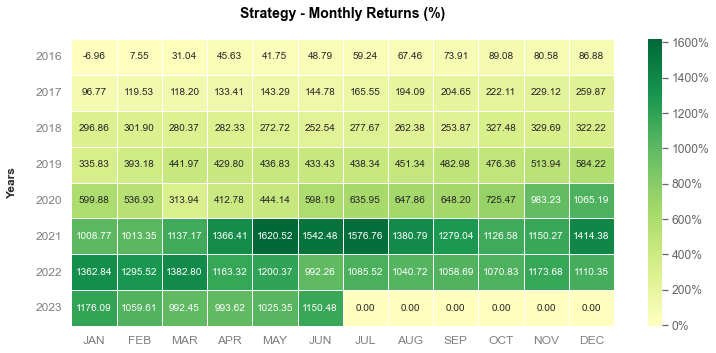

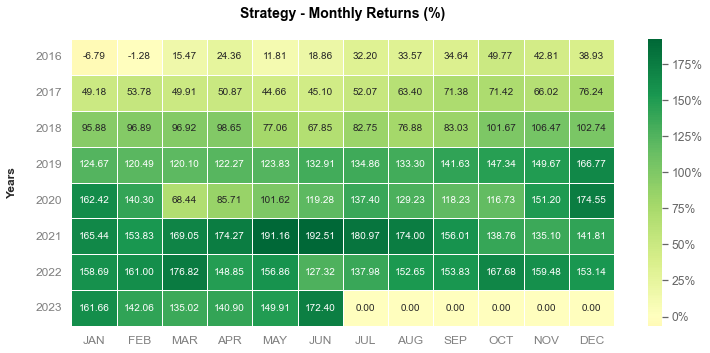

In [35]:
# Vamos utilizar a biblioteca Quantstats 
qs.extend_pandas()
rentabilidade_por_carteiras.index = pd.to_datetime(rentabilidade_por_carteiras.index)
rentabilidade_por_carteiras['modelo'].plot_monthly_heatmap()
rentabilidade_por_carteiras['ibovespa'].plot_monthly_heatmap()

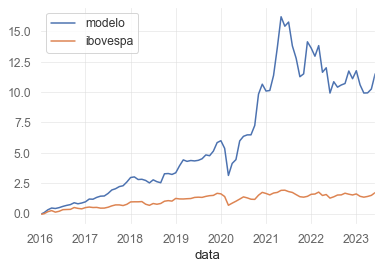

In [49]:
rentabilidade_por_carteiras.plot()
plt.savefig('Rentabilidade Por Carteira', dpi=300) 

In [174]:
rentabilidade_ao_ano = (1 + rentabilidade_por_carteiras.loc['2023-06-30', 'modelo']) ** (1/7.5) -1
rentabilidade_ao_ano

0.40047940152735406

###### <font color='Red'> Projeto (05/11/2023): Executando Backtest no Modelo "Magic Formula" - William E. Santos. 